# Assignment 1: Linear Programming

**Module**: COMP30930 Optimisation, Autumn 2021<br/>
**Student**: Rajit Banerjee, 18202817

In [1]:
using JuMP
using Xpress
using Plots

┌ Info: Xpress: Found license file /Applications/FICO Xpress/xpressmp/bin/xpauth.xpr
└ @ Xpress /Users/rajitbanerjee/.julia/packages/Xpress/eJoYN/src/license.jl:44
┌ Info: Xpress: Development license detected.
└ @ Xpress /Users/rajitbanerjee/.julia/packages/Xpress/eJoYN/src/license.jl:89


### Question 1 (20 points)

LP1:

Maximise:
$$Z = x + 2y$$

Subject to constraints:
$$
\begin{align}
    5x + 10y &\le 20 \\
    4x + 2y &\le 12 \\
    3x + 10y &\le 18 \\
    4x + 6y &\le 14 \\
    x, y &\ge 0 \\
\end{align}
$$

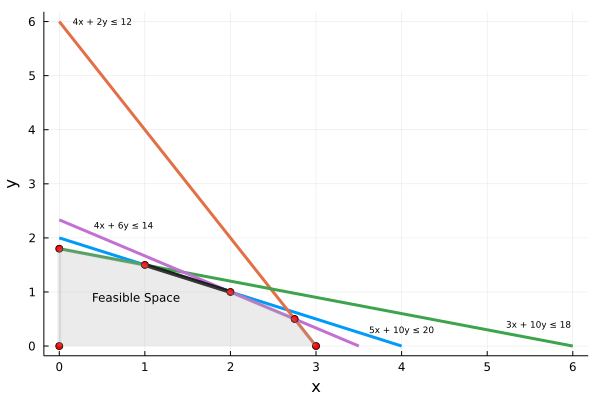

In [2]:
# Graphical solution
line1 = "5x + 10y ≤ 20"
x1 = 20/5       # 4
y1 = 20/10      # 2

line2 = "4x + 2y ≤ 12"
x2 = 12/4       # 3
y2 = 12/2       # 6

line3 = "3x + 10y ≤ 18"
x3 = 18/3       # 6
y3 = 18/10      # 1.8

line4 = "4x + 6y ≤ 14"
x4 = 14/4       # 3.5
y4 = 14/6       # 7//3


# Plotting constraint lines
p1 = plot([0, x1], [y1, 0], lw=3, annotation=[(4, y1 - 1.7, line1, 6)], xlabel="x", ylabel="y")
p2 = plot!(p1, [0, x2], [y2, 0], lw=3, annotation=[(0.5, y2, line2, 6)])
p3 = plot!(p2, [0, x3], [y3, 0], lw=3, annotation=[(5.6, y3 - 1.4, line3, 6)])
p4 = plot!(p3, [0, x4], [y4, 0], lw=3, annotation=[(0.75, y4 - 0.1, line4, 6)])


# Basic feasible solutions (BFS) correspond to corners of the polyhedron of feasible solutions
# Point s1:
# => (x = 0, y = 0)
# Z = 0 + 2 * 0 = 0

# Point s2:
# => (x = 0, y = 1.8)
# Z = 0 + 2 * 1.8 = 3.6

# Point s3:
# 5x + 10y = 20
# 3x + 10y = 18
# => (x = 1, y = 1.5)
# Z = 1 + 2 * 1.5 = 4 (MAX)

# Point s4:
# 5x + 10y = 20
# 4x + 6y = 14
# => (x = 2, y = 1)
# Z = 2 + 2 * 1 = 4 (MAX)

# Point s5:
# 4x + 2y = 12
# 4x + 6y = 14
# => (x = 2.75, y = 0.5)
# Z = 2.75 + 2 * 0.5 = 3.75

# Point s6:
# => (x = 3, y = 0)
# Z = 3 + 2 * 0 = 3


# Plotting BFS-s
xs = [0, 0, 1, 2, 2.75, 3]
ys = [0, 1.8, 1.5, 1, 0.5, 0]
p5 = plot!(p4, [1, 2], [1.5, 1], lw=4, color="black")
p6 = plot!(p5, xs, ys, seriestype=:scatter, legend=false, color="red")

# Shading the feasible space
plot!(p6, xs, ys, palette=cgrad(:grays), lw=4, fill=0, α=0.2, annotation=[(0.9, 0.9, "Feasible Space", 8)])

A linear program can either have exactly 1 or more than 1 optimal solution, but not exactly 2. Since the above LP1 gives the optimal value Z = 4 at 2 points s3 (1, 1.5) and s4 (2, 1), it implies that the optimal solution set comprises:<br>
**All points on the line $5x + 10y = 20, \; x \in \mathbb{R}, 1 \le x \le 2$**

LP2:

Maximise:
$$Z = x_1 + x_2$$

Subject to constraints:
$$
\begin{align}
    x_1 + 2x_2 &\ge 2 \\
    2x_1 +x_2 &\ge 2 \\
    x_1 + x_2 &\le 1 \\
    x_1, x_2  &\ge 0 \\
\end{align}
$$

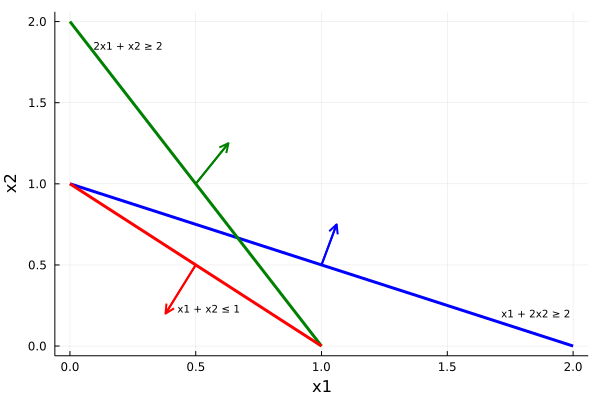

In [3]:
line1 = "x1 + 2x2 ≥ 2"
x11 = 2
x21 = 1

line2 = "2x1 + x2 ≥ 2"
x12 = 1
x22 = 2

line3 = "x1 + x2 ≤ 1"
x13 = 1
x23 = 1 

# Plotting constraint lines
p1 = plot([0, x11], [x21, 0], lw=3, annotation=[(1.85, 0.2, line1, 7)], color="blue", xlabel="x1", ylabel="x2")
p2 = plot!(p1, [1, 1.06], [0.5, 0.75], lw=2, arrow=0.4, color="blue", legend=false)

p3 = plot!(p2, [0, x12], [x22, 0], lw=3, annotation=[(0.23, 1.85, line2, 7)], color="green")
p4 = plot!(p3, [0.5, 0.63], [1, 1.25], lw=2, arrow=0.4, color="green")

p5 = plot!(p4, [0, x13], [x23, 0], lw=3, annotation=[(0.55, 0.23, line3, 7)], color="red")
p6 = plot!(p5, [0.5, 0.38], [0.5, 0.2], lw=2, arrow=0.4, color="red")

We can see from the plot above that all the constraints of LP2 cannot be satisfied simultaneously, implying that there is no feasible region, i.e. the **set $F$ of feasible solutions is empty ($F = \emptyset$)**.

### Question 2 (25 points)

#### LP Formulation

Maximise:
$$Z = \frac{1}{3} \left( N_{T1} + 10 I_{T1} + 10 C_{T1} \right) + \frac{1}{3} \left( I_{T2} + 10 N_{T2} + 10 C_{T2} \right) + \frac{1}{3} \left( C_{T3} + 10 N_{T3} + 10 I_{T3} \right) \;\text{(unit profits from tasks T1, T2, T3)}$$

Subject to constraints:
$$
\begin{align}
    N_{T1} + N_{T2} + N_{T3} &\le 1 \;&\text{(total network resources)} \\
    I_{T1} + I_{T2} + I_{T3} &\le 1 \;&\text{(total I/O resources)} \\
    C_{T1} + C_{T2} + C_{T3} &\le 1 \;&\text{(total computing resources)} \\
    N_{T1}, I_{T2}, C_{T3} &\le 1 \;&\text{(intensive task resource requirements)} \\
    I_{T1}, C_{TI}, N_{T2}, C_{T2}, N_{T3}, I_{T3} &\le 0.1 \;&\text{(non-intensive task resource requirements)} \\
    N_{T1} = 10I_{T1} &= 10C_{T1} \;&\text{(T1 requirement proportionality)} \\
    I_{T2} = 10N_{T2} &= 10C_{T2} \;&\text{(T2 requirement proportionality)} \\
    C_{T3} = 10N_{T3} &= 10I_{T3} \;&\text{(T3 requirement proportionality)} \\
    N_{T1}, N_{T2}, N_{T3}, I_{T1}, I_{T2}, I_{T3}, C_{T1}, C_{T2}, C_{T3} &\ge 0 \;&\text{(non-negativity)} \\
\end{align}
$$

It is important to note the following:
- Maximising the total profits from the data centre is achieved by *maximising the unit profits* from running each of the tasks T1, T2 and T3.
- It is given that running any task at a slower rate *decreases the profits and resource requirements proportionally*. E.g. For task T1, if only 80% of network resources are available for use (20% lower than requirement for T1), then the usage for both I/O and computing resources will drop proportionally to 8%, even if the full 10% requirement can be satisfied. This is because an entire task's rate is the atomic unit here, and the different resources for any given task will be used up at a common rate proportional to requirements.

In [4]:
model = Model(Xpress.Optimizer)

# Decision variables
# NT1: proportion of network resources used by task T1
# IT1: proportion of I/O resources used by task T1
# CT1: proportion of computing resources used by task T1
# NT2: proportion of network resources used by task T2
# IT2: proportion of I/O resources used by task T2
# CT2: proportion of computing resources used by task T2
# NT3: proportion of network resources used by task T3
# IT3: proportion of I/O resources used by task T3
# CT3: proportion of computing resources used by task T3
@variable(model, 0 ≤ NT1 ≤ 1)
@variable(model, 0 ≤ IT1 ≤ 1)
@variable(model, 0 ≤ CT1 ≤ 1)
@variable(model, 0 ≤ NT2 ≤ 1)
@variable(model, 0 ≤ IT2 ≤ 1)
@variable(model, 0 ≤ CT2 ≤ 1)
@variable(model, 0 ≤ NT3 ≤ 1)
@variable(model, 0 ≤ IT3 ≤ 1)
@variable(model, 0 ≤ CT3 ≤ 1)


# Constraints: total resource availability = 100%
@constraint(model, c1, NT1 + NT2 + NT3 ≤ 1)
@constraint(model, c2, IT1 + IT2 + IT3 ≤ 1)
@constraint(model, c3, CT1 + CT2 + CT3 ≤ 1)

# Constraints: intensive task resource requirements
@constraint(model, c4, NT1 ≤ 1)
@constraint(model, c5, IT2 ≤ 1)
@constraint(model, c6, CT3 ≤ 1)

# Constraints: non-intensive task resource requirements
@constraint(model, c7, IT1 ≤ 0.1)
@constraint(model, c8, CT1 ≤ 0.1)
@constraint(model, c9, NT2 ≤ 0.1)
@constraint(model, c10, CT2 ≤ 0.1)
@constraint(model, c11, NT3 ≤ 0.1)
@constraint(model, c12, IT3 ≤ 0.1)

# Constraints: task T1 requirement proporionality => NT1 = 10 IT1 = 10 CT1
@constraint(model, NT1 ≤ 10IT1)
@constraint(model, NT1 ≥ 10IT1)
@constraint(model, NT1 ≤ 10CT1)
@constraint(model, NT1 ≥ 10CT1)

# Constraints: task T2 requirement proporionality => IT2 = 10 NT2 = 10 CT2
@constraint(model, IT2 ≤ 10NT2)
@constraint(model, IT2 ≥ 10NT2)
@constraint(model, IT2 ≤ 10CT2)
@constraint(model, IT2 ≥ 10CT2)

# Constraints: task T3 requirement proporionality => CT3 = 10 NT3 = 10 IT3
@constraint(model, CT3 ≤ 10NT3)
@constraint(model, CT3 ≥ 10NT3)
@constraint(model, CT3 ≤ 10IT3)
@constraint(model, CT3 ≥ 10IT3)


# Objective function (simplified from Z defined in LP formulation)
@objective(model, Max, (NT1 + IT2 + CT3)/3 + (IT1 + CT1 + NT2 + CT2 + NT3 + IT3)/0.3)
optimize!(model)

# Solution
println(model)
@show vNT1 = value(NT1)
@show vIT1 = value(IT1)
@show vCT1 = value(CT1)
@show vNT2 = value(NT2)
@show vIT2 = value(IT2)
@show vCT2 = value(CT2)
@show vNT3 = value(NT3)
@show vIT3 = value(IT3)
@show vCT3 = value(CT3)
@show objective_value(model);

Max 0.3333333333333333 NT1 + 0.3333333333333333 IT2 + 0.3333333333333333 CT3 + 3.3333333333333335 IT1 + 3.3333333333333335 CT1 + 3.3333333333333335 NT2 + 3.3333333333333335 CT2 + 3.3333333333333335 NT3 + 3.3333333333333335 IT3
Subject to
 NT1 - 10 IT1 ≥ 0.0
 NT1 - 10 CT1 ≥ 0.0
 -10 NT2 + IT2 ≥ 0.0
 IT2 - 10 CT2 ≥ 0.0
 -10 NT3 + CT3 ≥ 0.0
 -10 IT3 + CT3 ≥ 0.0
 c1 : NT1 + NT2 + NT3 ≤ 1.0
 c2 : IT1 + IT2 + IT3 ≤ 1.0
 c3 : CT1 + CT2 + CT3 ≤ 1.0
 c4 : NT1 ≤ 1.0
 c5 : IT2 ≤ 1.0
 c6 : CT3 ≤ 1.0
 c7 : IT1 ≤ 0.1
 c8 : CT1 ≤ 0.1
 c9 : NT2 ≤ 0.1
 c10 : CT2 ≤ 0.1
 c11 : NT3 ≤ 0.1
 c12 : IT3 ≤ 0.1
 NT1 - 10 IT1 ≤ 0.0
 NT1 - 10 CT1 ≤ 0.0
 -10 NT2 + IT2 ≤ 0.0
 IT2 - 10 CT2 ≤ 0.0
 -10 NT3 + CT3 ≤ 0.0
 -10 IT3 + CT3 ≤ 0.0
 NT1 ≥ 0.0
 IT1 ≥ 0.0
 CT1 ≥ 0.0
 NT2 ≥ 0.0
 IT2 ≥ 0.0
 CT2 ≥ 0.0
 NT3 ≥ 0.0
 IT3 ≥ 0.0
 CT3 ≥ 0.0
 NT1 ≤ 1.0
 IT1 ≤ 1.0
 CT1 ≤ 1.0
 NT2 ≤ 1.0
 IT2 ≤ 1.0
 CT2 ≤ 1.0
 NT3 ≤ 1.0
 IT3 ≤ 1.0
 CT3 ≤ 1.0

vNT1 = value(NT1) = 0.8333333333333334
vIT1 = value(IT1) = 0.08333333333333334
vCT1 = 

The decision variable values in the above solution are expressed in proportions between 0 and 1.<br/>
**Percentage of network, I/O and computing resources (in order) used by tasks:**<br/>
$T1 = 83.334\%, 8.334\%, 8.334\%$<br/>
$T2 = 8.334\%, 83.334\%, 8.334\%$<br/>
$T3 = 8.334\%, 8.334\%, 83.34\%$<br/>


The objective function value is expressed in an arbitrary price unit. From the above solution, we can that **2.5 units of profit** can be obtained if the resources are distributed optimally between tasks T1, T2 and T3 as shown. The hypothetical case of 3 units total profit (1 unit from each of the 3 tasks), where each task has access to all the resources it needs, is not practically possible if the resources are being shared by the tasks running in parallel.

#### Sensitivity Analysis

In [5]:
report = lp_sensitivity_report(model);
println("Without violating the primal or dual feasibility of the basic solution,")

# Sensitivity ranges
NT1_lo, NT1_hi = report[NT1]
IT1_lo, IT1_hi = report[IT1]
CT1_lo, CT1_hi = report[CT1]
println("\nThe objective coefficient of NT1 can decrease to $(1//3 + NT1_lo) or increase to $(1//3 + NT1_hi)")
println("The objective coefficient of IT1 can decrease to $(10//3 + IT1_lo) or increase to $(10//3 + IT1_hi)")
println("The objective coefficient of CT1 can decrease to $(10//3 + CT1_lo) or increase to $(10//3 + CT1_hi)")

NT2_lo, NT2_hi = report[NT2]
IT2_lo, IT2_hi = report[IT2]
CT2_lo, CT2_hi = report[CT2]
println("\nThe objective coefficient of NT2 can decrease to $(10//3 + NT2_lo) or increase to $(10//3 + NT2_hi)")
println("The objective coefficient of IT2 can decrease to $(1//3 + IT2_lo) or increase to $(1//3 + IT2_hi)")
println("The objective coefficient of CT2 can decrease to $(10//3 + CT2_lo) or increase to $(10//3 + CT2_hi)")

NT3_lo, NT3_hi = report[NT3]
IT3_lo, IT3_hi = report[IT3]
CT3_lo, CT3_hi = report[CT3]
println("\nThe objective coefficient of NT3 can decrease to $(10//3 + NT3_lo) or increase to $(10//3 + NT3_hi)")
println("The objective coefficient of IT3 can decrease to $(10//3 + IT3_lo) or increase to $(10//3 + IT3_hi)")
println("The objective coefficient of CT3 can decrease to $(1//3 + CT3_lo) or increase to $(1//3 + CT3_hi)")

Without violating the primal or dual feasibility of the basic solution,

The objective coefficient of NT1 can decrease to -0.4848484848484848 or increase to 2.7878787878787876
The objective coefficient of IT1 can decrease to 0.856269113149847 or increase to 27.878787878787875
The objective coefficient of CT1 can decrease to 0.8562691131498479 or increase to 27.878787878787875

The objective coefficient of NT2 can decrease to 0.856269113149847 or increase to 27.878787878787875
The objective coefficient of IT2 can decrease to -0.48484848484848514 or increase to 2.7878787878787876
The objective coefficient of CT2 can decrease to 0.8562691131498479 or increase to 27.878787878787875

The objective coefficient of NT3 can decrease to 0.8562691131498474 or increase to 27.878787878787875
The objective coefficient of IT3 can decrease to 0.8562691131498474 or increase to 27.878787878787875
The objective coefficient of CT3 can decrease to -0.4848484848484847 or increase to 2.7878787878787876


**Interpretation**

The current optimal solution will remain optimal in the following sensitivity ranges:
- Using intensive resources (network for T1, I/O for T2 and computing for T3) can yield a profit of $2.78787 * 3 = 8.3636$ units or even a **loss** of $0.48484 * 3 = 1.4545$ units.
- Using non-intensive resources (I/O and computing for T1, network and computing for T2, and network and I/O for T3) can yield a higher profit of $27.8787 * 3/10 = 8.3636$ units or lower profit of $0.856269 * 3/10 = 0.2569$ units.

In [6]:
println("Without altering the solution variable mix,")

c1_lo, c1_hi = report[c1]
c2_lo, c2_hi = report[c2]
c3_lo, c3_hi = report[c3]
c4_lo, c4_hi = report[c4]
c5_lo, c5_hi = report[c5]
c6_lo, c6_hi = report[c6]
c7_lo, c7_hi = report[c7]
c8_lo, c8_hi = report[c8]
c9_lo, c9_hi = report[c9]
c10_lo, c10_hi = report[c10]
c11_lo, c11_hi = report[c11]
c12_lo, c12_hi = report[c12]


# Current RHS is 1: total available resources
println("\nThe RHS of $(c1) can decrease to $(1+c1_lo) or increase to $(1+c1_hi)")
println("The RHS of $(c2) can decrease to $(1+c2_lo) or increase to $(1+c2_hi)")
println("The RHS of $(c3) can decrease to $(1+c3_lo) or increase to $(1+c3_hi)")

# Current RHS is 1: intensive task resource requirements
println("\nThe RHS of $(c4) can decrease to $(1+c4_lo) or increase to $(1+c4_hi)")
println("The RHS of $(c5) can decrease to $(1+c5_lo) or increase to $(1+c5_hi)")
println("The RHS of $(c6) can decrease to $(1+c6_lo) or increase to $(1+c6_hi)")

# Current RHS is 0.1: non-intensive task resource requirements
println("\nThe RHS of $(c7) can decrease to $(0.1+c7_lo) or increase to $(0.1+c7_hi)")
println("The RHS of $(c8) can decrease to $(0.1+c8_lo) or increase to $(0.1+c8_hi)")
println("The RHS of $(c9) can decrease to $(0.1+c9_lo) or increase to $(0.1+c9_hi)")
println("The RHS of $(c10) can decrease to $(0.1+c10_lo) or increase to $(0.1+c10_hi)")
println("The RHS of $(c11) can decrease to $(0.1+c11_lo) or increase to $(0.1+c11_hi)")
println("The RHS of $(c12) can decrease to $(0.1+c12_lo) or increase to $(0.1+c12_hi)")

Without altering the solution variable mix,

The RHS of c1 : NT1 + NT2 + NT3 ≤ 1.0 can decrease to 0.18181818181818188 or increase to 1.1636363636363636
The RHS of c2 : IT1 + IT2 + IT3 ≤ 1.0 can decrease to 0.18181818181818155 or increase to 1.1636363636363636
The RHS of c3 : CT1 + CT2 + CT3 ≤ 1.0 can decrease to 0.181818181818182 or increase to 1.1636363636363636

The RHS of c4 : NT1 ≤ 1.0 can decrease to 0.8333333333333334 or increase to Inf
The RHS of c5 : IT2 ≤ 1.0 can decrease to 0.8333333333333335 or increase to Inf
The RHS of c6 : CT3 ≤ 1.0 can decrease to 0.8333333333333333 or increase to Inf

The RHS of c7 : IT1 ≤ 0.1 can decrease to 0.08333333333333334 or increase to Inf
The RHS of c8 : CT1 ≤ 0.1 can decrease to 0.08333333333333334 or increase to Inf
The RHS of c9 : NT2 ≤ 0.1 can decrease to 0.08333333333333336 or increase to Inf
The RHS of c10 : CT2 ≤ 0.1 can decrease to 0.08333333333333336 or increase to Inf
The RHS of c11 : NT3 ≤ 0.1 can decrease to 0.08333333333333333 or 

**Interpretation**

With no change to the variables in the basic feasible solution,
- For the total resource availability constraints (c1, c2, c3), each of network, I/O and computing resources available in total could decrease to 18.18% or increase to 116.36% of current value.
- For the intensive task resource requirement constraints (c4, c5, c6), the relevant resource (network for T1, I/O for T2 and computing for T3) can be decreased from 100% to 83.334% or increased indefinitely.
- For the non-intensive task resource requirement constraints (c7, c8, c9, c10, c11, c12), the relevant resource (I/O and computing for T1, network and computing for T2, and network and I/O for T3) can be decreased from 10% to 8.334% or increased indefinitely.

Finally, it doesn't make sense to evaluate the RHS sensitivity of the remaining constraints ($NT1 = 10 IT1 = 10 CT1; IT2 = 10 NT2 = 10 CT2; CT3 = 10 NT3 = 10 IT3$) since they were introduced only to capture the resource requirement proportionality for the 3 tasks.

### Question 3 (25 Points)

#### LP Formulation

Maximise:
$$Z = \delta \qquad\qquad\qquad\qquad\qquad\qquad\text{(margin of separator)}$$

Subject to constraints:
$$
\begin{align}
    W &\ge aH + b + \delta, \;\forall\; class(H, W) = +1 \;&\text{(class: "Apple")} \\
    W &\le aH + b - \delta, \;\forall\; class(H, W) = -1 \;&\text{(class: "Pear")} \\
    \delta &\ge 0 \;&\text{(non-negativity)} \\
\end{align}
$$

In [7]:
model = Model(Xpress.Optimizer)
# Labelled training data: ((Height H, Width W), Class) 
# Classes: (+1 = "Apple", -1 = "Pear")
data = [
    ((60, 62), +1),
    ((70, 53), -1),
    ((55, 50), +1),
    ((76, 40), -1),
    ((68, 45), -1),
    ((65, 68), +1),
    ((63, 45), -1),
    ((55, 56), +1),
    ((68, 65), +1),
    ((60, 58), +1)
]

# Decision variables
# a: slope of maximal margin separator
# b: Y-intercept of maximal margin separator
# δ: margin
@variable(model, a)
@variable(model, b)
@variable(model, δ ≥ 0)

# Constraints 
for ((H, W), class) in data
    if class == 1
        # All points corresponding to apples are at least δ above the line
        @constraint(model, W ≥ a * H + b + δ)
    else
        # All points corresponding to pears are at least δ below the line
        @constraint(model, W ≤  a * H + b - δ)
    end
end

# Objective function
@objective(model, Max, δ)
optimize!(model)

# Solution
println(model)
@show a_val = value(a)
@show b_val = value(b)
@show objective_value(model);

Max δ
Subject to
 -60 a - b - δ ≥ -62.0
 -55 a - b - δ ≥ -50.0
 -65 a - b - δ ≥ -68.0
 -55 a - b - δ ≥ -56.0
 -68 a - b - δ ≥ -65.0
 -60 a - b - δ ≥ -58.0
 -70 a - b + δ ≤ -53.0
 -76 a - b + δ ≤ -40.0
 -68 a - b + δ ≤ -45.0
 -63 a - b + δ ≤ -45.0
 δ ≥ 0.0

a_val = value(a) = 1.153846153846154
b_val = value(b) = -20.576923076923084
objective_value(model) = 7.115384615384616


**The required maximal margin separator is** $W = 1.154\; H -20.577$.<br/>
**Margin,** $\delta = 7.115$

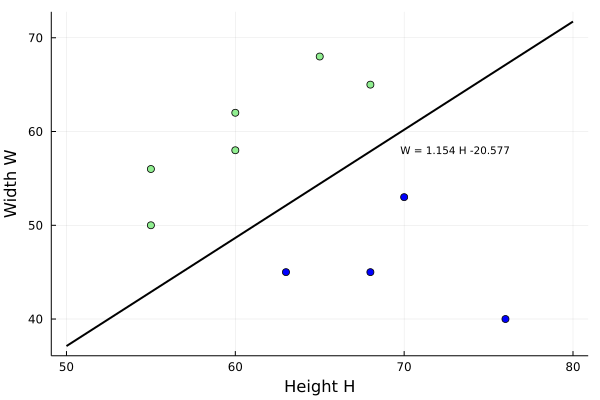

In [8]:
# Plot the maximal margin separator
data_pos = [point for (point, class) in data if class == +1]
data_neg = [point for (point, class) in data if class == -1]

p1 = plot([p[1] for p in data_pos], [p[2] for p in data_pos], 
    seriestype=:scatter, legend=false, color="lightgreen", xlabel="Height H", ylabel="Width W")
p2 = plot!(p1, [p[1] for p in data_neg], [p[2] for p in data_neg], 
    seriestype=:scatter, legend=false, color="blue")
p3 = plot!(p2, [50, 80], [50 * a_val + b_val, 80 * a_val + b_val], 
    lw=2, 
    annotation=[(73, 58, "W = $(round(a_val, digits=3)) H $(round(b_val, digits=3))", 7)], 
    color="black")

Instead of a line, if the maximal margin separator were a parabola $y = ax^2 + bx + c$, the problem can still be formulated as an LP. This is because our problem is still linear in terms of our decision variables ($a, b, c$). Equation of separator: $W = aH^2 +bH + c$.

Maximise:
$$Z = \delta \qquad\qquad\qquad\qquad\qquad\qquad\qquad\text{(margin of separator)}$$

Subject to constraints:
$$
\begin{align}
    W &\ge aH^2 + bH + c + \delta, \;\forall\; class(H, W) = +1 \;&\text{(class: "Apple")} \\
    W &\le aH^2 + bH + c - \delta, \;\forall\; class(H, W) = -1 \;&\text{(class: "Pear")} \\
    \delta &\ge 0 \;&\text{(non-negativity)} \\
\end{align}
$$

In [9]:
model = Model(Xpress.Optimizer)

# Decision variables
# a: coefficient of H^2 term in maximal margin separator
# b: coefficient of H^1 term in maximal margin separator
# c: coefficient of H^0 term in maximal margin separator
# δ: margin
@variable(model, a)
@variable(model, b)
@variable(model, c)
@variable(model, δ ≥ 0)

# Constraints 
for ((H, W), class) in data
    if class == 1
        # All points corresponding to apples are at least δ above the parabola
        @constraint(model, W ≥ (H^2)a + (H)b + c + δ)
    else
        # All points corresponding to pears are at least δ below the parabola
        @constraint(model, W ≤ (H^2)a + (H)b + c - δ)
    end
end

# Objective function
@objective(model, Max, δ)
optimize!(model)

# Solution
println(model)
@show a_val = value(a)
@show b_val = value(b)
@show c_val = value(c)
@show objective_value(model);

Max δ
Subject to
 -3600 a - 60 b - c - δ ≥ -62.0
 -3025 a - 55 b - c - δ ≥ -50.0
 -4225 a - 65 b - c - δ ≥ -68.0
 -3025 a - 55 b - c - δ ≥ -56.0
 -4624 a - 68 b - c - δ ≥ -65.0
 -3600 a - 60 b - c - δ ≥ -58.0
 -4900 a - 70 b - c + δ ≤ -53.0
 -5776 a - 76 b - c + δ ≤ -40.0
 -4624 a - 68 b - c + δ ≤ -45.0
 -3969 a - 63 b - c + δ ≤ -45.0
 δ ≥ 0.0

a_val = value(a) = -0.0010989010989011204
b_val = value(b) = 1.2890109890109918
c_val = value(c) = -24.708791208791297
objective_value(model) = 7.137362637362637


**The required maximal margin separator is** $W = -0.001\; H^2 + 1.289\; H -24.709$.<br/>
**Margin,** $\delta = 7.137$

We see that the parabolic separator (plotted below) yields a slightly higher/better margin ($\delta$) compared to the linear one (7.115).

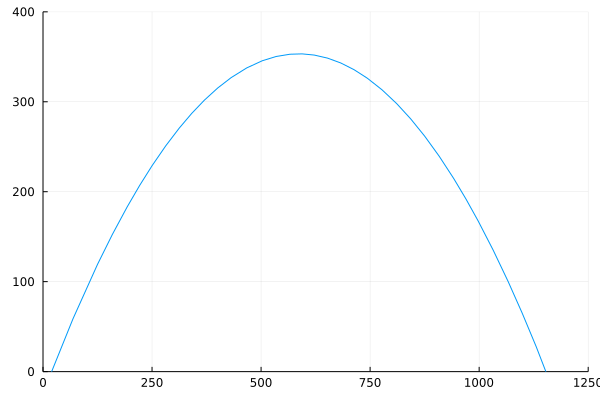

In [10]:
plot(x -> a_val * (x^2) + b_val * x + c_val, xlims=(0, 1250), ylims=(0, 400), legend=false)

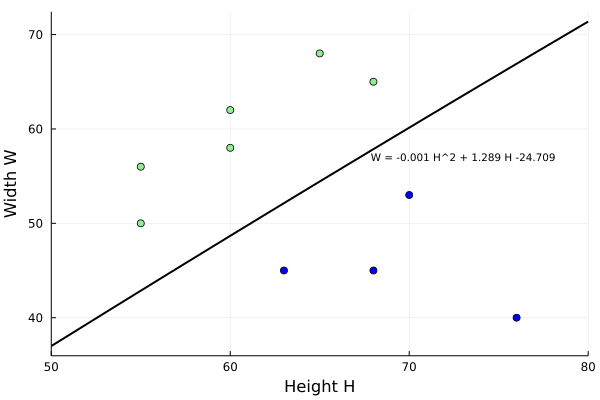

In [11]:
# Plot the maximal margin separator
data_pos = [point for (point, class) in data if class == +1]
data_neg = [point for (point, class) in data if class == -1]

p1 = plot([p[1] for p in data_pos], [p[2] for p in data_pos], 
    seriestype=:scatter, legend=false, color="lightgreen", xlabel="Height H", ylabel="Width W")
p2 = plot!(p1, [p[1] for p in data_neg], [p[2] for p in data_neg], 
    seriestype=:scatter, legend=false, color="blue")
p3 = plot!(p2, x -> a_val * (x^2) + b_val * x + c_val, 
    xlims=(50, 80),
    lw=2, 
    annotation=[(73, 57, "W = $(round(a_val, digits=3)) H^2 + $(round(b_val, digits=3)) H $(round(c_val, digits=3))", 7)], 
    color="black")

The parabolic separator above resembles a line simply due to the scale of the plot (similar to how the Earth appears flat!)

### Question 4 (30 Points)

#### LP Formulation

To learn a linear function, $power = a * speed + b$, we have the unconstrained optimisation problem of minimising the sum of absolute errors/deviations:

Minimise:
$$Z = \sum_{\forall i} \mid power_{i} - (a * speed_{i} + b) \mid$$

We note that the above objective function is non-linear. To make it linear, we introduce a sequence of new variables $E_{i}$ as well as corresponding constraints. This reformulation essentially follows from the definition of the absolute value function: 
$$
\left| x \right|=
\left\{
  \begin{matrix} x, \;\text{if}\; x\geq 0\\ -x, \;\text{if}\; x<0 \end{matrix}
\right.
$$

The reformulated linear objective LP is as follows:

Minimise:
$$Z = \sum_{\forall i} E_{i}$$

Subject to constraints:
$$
\begin{align}
    E_{i} &\ge power_{i} - (a * speed_{i} + b) \;\forall\; i \\
    E_{i} &\ge -(power_{i} - (a * speed_{i} + b)) \;\forall\; i \\
\end{align}
$$

In [12]:
model = Model(Xpress.Optimizer)
# Data points: (Speed, Power)
data = [
    (2.0, 0.3),
    (3.0, 0.3),
    (1.0, 0.3),
    (2.0, 0.4),
    (6.0, 0.5),
    (7.0, 0.5),
    (6.0, 0.7),
    (8.0, 0.6),
    (10.0, 0.7),
    (9.0, 0.5)
]

# Decision variables
# a: slope of predictor line
# b: Y-intercept of predictor line
# E[]: absolute value of errors
@variable(model, a)
@variable(model, b)
@variable(model, E[1:length(data)])

# Constraints
for (i, (speed_i, power_i)) in enumerate(data)
    # Model is reformulated by introducing 2 new inequality constraints for each point, 
    # instead of having absolute value functions in the objective
    @constraint(model, E[i] ≥ power_i - (a * speed_i + b))
    @constraint(model, E[i] ≥ -(power_i - (a * speed_i + b)))
end

# Objective function
@objective(model, Min, sum(E))
optimize!(model)

# Solution
println(model)
@show a_val = value(a)
@show b_val = value(b)
@show objective_value(model);

Min E[1] + E[2] + E[3] + E[4] + E[5] + E[6] + E[7] + E[8] + E[9] + E[10]
Subject to
 2 a + b + E[1] ≥ 0.3
 -2 a - b + E[1] ≥ -0.3
 3 a + b + E[2] ≥ 0.3
 -3 a - b + E[2] ≥ -0.3
 a + b + E[3] ≥ 0.3
 -a - b + E[3] ≥ -0.3
 2 a + b + E[4] ≥ 0.4
 -2 a - b + E[4] ≥ -0.4
 6 a + b + E[5] ≥ 0.5
 -6 a - b + E[5] ≥ -0.5
 7 a + b + E[6] ≥ 0.5
 -7 a - b + E[6] ≥ -0.5
 6 a + b + E[7] ≥ 0.7
 -6 a - b + E[7] ≥ -0.7
 8 a + b + E[8] ≥ 0.6
 -8 a - b + E[8] ≥ -0.6
 10 a + b + E[9] ≥ 0.7
 -10 a - b + E[9] ≥ -0.7
 9 a + b + E[10] ≥ 0.5
 -9 a - b + E[10] ≥ -0.5

a_val = value(a) = 0.04285714285714285
b_val = value(b) = 0.2571428571428571
objective_value(model) = 0.5999999999999996


**The required linear function to minimise absolute errors**: $power = 0.043 * speed + 0.257$

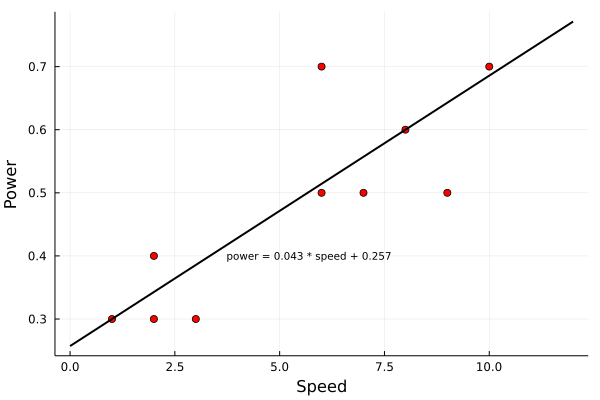

In [13]:
# Plotting the solution
p1 = plot([p[1] for p in data], [p[2] for p in data], 
    seriestype=:scatter, legend=false, color="red", xlabel="Speed", ylabel="Power")
p2 = plot!(p1, [0, 12], [b_val, 12 * a_val + b_val], 
    lw=2, 
    annotation=[(5.7, 0.4, "power = $(round(a_val, digits=3)) * speed + $(round(b_val, digits=3))", 7)], 
    color="black")